<a href="https://colab.research.google.com/github/MohammedAliBelay/coal-nalaysis/blob/main/PCA_of_Tolay_coal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load coal data
df = pd.read_csv("/for regression.csv")

# Print current column names to verify
print("Original DataFrame columns:", df.columns.tolist())

df.rename(columns={
    'Moisture _%': 'Moisture',
    'Volatile_mater _%': 'VM',
    'fixed_carbon_%': 'FC',
    'Ash_%': 'Ash',

    'Measured HCV (MJ/Kg)': 'CV'
}, inplace=True)

# Inputs and target
X = df[['Moisture', 'Ash', 'VM', 'FC']]
y = df['CV']

# 1. Standardize inputs
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA: keep 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Number of PCA components used:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# 3. Regression using PCA components
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Model accuracy
print("Training R2:", model.score(X_train, y_train))
print("Testing R2:", model.score(X_test, y_test))

Original DataFrame columns: ['sample_ID', 'Moisture _%', 'Volatile_mater _%', 'fixed_carbon_%', 'Ash_%', 'Measured HCV (MJ/Kg)']
Number of PCA components used: 3
Explained variance ratio: [0.6875169  0.25361305 0.04145843]
Training R2: 0.9274100432571433
Testing R2: 0.6050997341147724


Number of PCs used: 3
Explained variance ratio: [0.6875169  0.25361305 0.04145843]
PCA loadings:
 [[-0.37182048  0.58042704 -0.45498643 -0.56377418]
 [ 0.75057923  0.17008278 -0.61391368  0.17553536]
 [-0.53479033  0.00084351 -0.44892094  0.71586911]]
Regression coefficients: [-2.56507911 -0.20051558  0.18067962]
Intercept: 12.954665955341895
Training R2: 0.9274100432571433
Testing R2: 0.6050997341147724


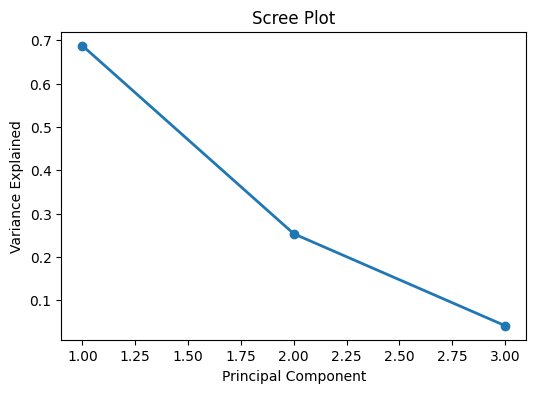

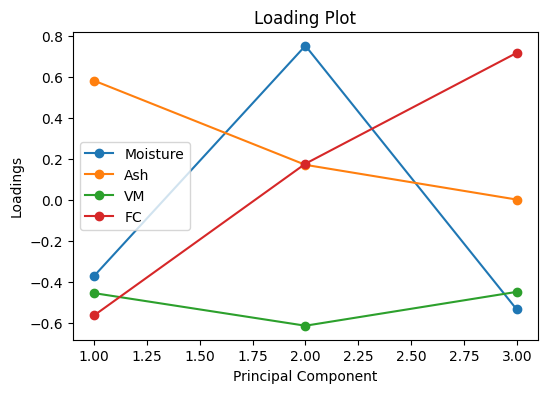

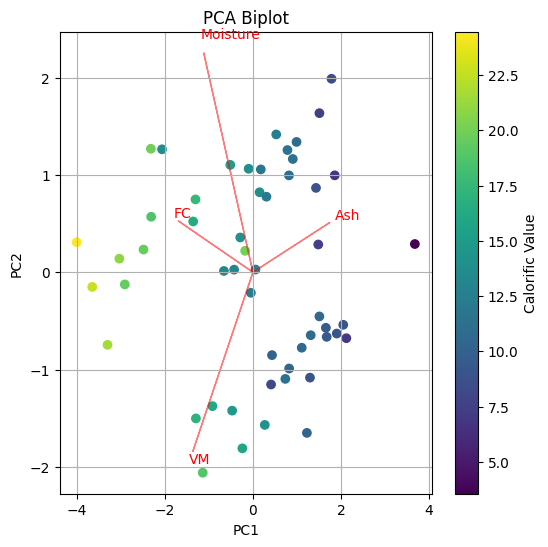

In [ ]:
# PCA-based Calorific Value Prediction
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. Load data
df = pd.read_csv("/for regression.csv")

# Rename columns to match the expected names in the rest of the code
df.rename(columns={
    'Moisture _%': 'Moisture',
    'Volatile_mater _%': 'VM',
    'fixed_carbon_%': 'FC',
    'Ash_%': 'Ash',
    'Measured HCV (MJ/Kg)': 'CV'
}, inplace=True)

X = df[['Moisture', 'Ash', 'VM', 'FC']]
y = df['CV']

# 2. Standardize data
-
sampler = StandardScaler()
X_scaled = sampler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=0.95)  # keep 95% variance
X_pca = pca.fit_transform(X_scaled)

print("Number of PCs used:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("PCA loadings:\n", pca.components_)

# 4. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Regression on PCs
model = LinearRegression()
model.fit(X_train, y_train)

print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Training R2:", model.score(X_train, y_train))
print("Testing R2:", model.score(X_test, y_test))

# 6. Scree plot

plt.figure(figsize=(6,4))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# 7. Loading plot
plt.figure(figsize=(6,4))
for i, feature in enumerate(X.columns):
    plt.plot(range(1, len(pca.components_)+1), pca.components_[:,i], marker='o', label=feature)
plt.title("Loading Plot")
plt.xlabel("Principal Component")
plt.ylabel("Loadings")
plt.legend()
plt.show()

# 8. PCA Biplot
plt.figure(figsize=(6,6))
pc1 = X_pca[:,0]
pc2 = X_pca[:,1]
plt.scatter(pc1, pc2, c=y, cmap='viridis')
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0,i]*3, pca.components_[1,i]*3,
              color='r', alpha=0.5)
    plt.text(pca.components_[0,i]*3.2, pca.components_[1,i]*3.2, feature, color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Biplot')
plt.colorbar(label='Calorific Value')
plt.grid()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Load data
df = pd.read_csv("/for regression.csv")

# Rename columns to match the expected names in the rest of the code
df.rename(columns={
    'Moisture _%': 'Moisture',
    'Volatile_mater _%': 'VM',
    'fixed_carbon_%': 'FC',
    'Ash_%': 'Ash',
    'Measured HCV (MJ/Kg)': 'CV'
}, inplace=True)

X = df[['Moisture', 'Ash', 'VM', 'FC']]
y = df['CV']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Regression on PCs
model = LinearRegression()
model.fit(X_pca, y)

# Compute final coefficients in original variables

import numpy as np

# b_i = regression coefficients for PCs
b = model.coef_

# a_ij = PCA loadings
a = pca.components_

# Compute combined coefficients
c = np.dot(b, a)  # 1D array: [c_M, c_A, c_VM, c_FC]

# Intercept adjusted for standardization
b0 = model.intercept_ - np.sum(c * scaler.mean_ / scaler.scale_)
c_scaled = c / scaler.scale_

# Display final equation
print(f"CV = {b0:.3f} + {c_scaled[0]:.3f}*Moisture + {c_scaled[1]:.3f}*Ash + {c_scaled[2]:.3f}*VM + {c_scaled[3]:.3f}*FC")

CV = 5.363 + 0.074*Moisture + -0.114*Ash + 0.269*VM + 0.133*FC
